In [ ]:
# use webuiapi.py from webuiapi folder
import sys
sys.path.append('./webuiapi')



In [2]:
import webuiapi

#api = webuiapi.WebUIApi(host='127.0.0.1', port=7860)
api = webuiapi.WebUIApi(host='localhost', port=7575)


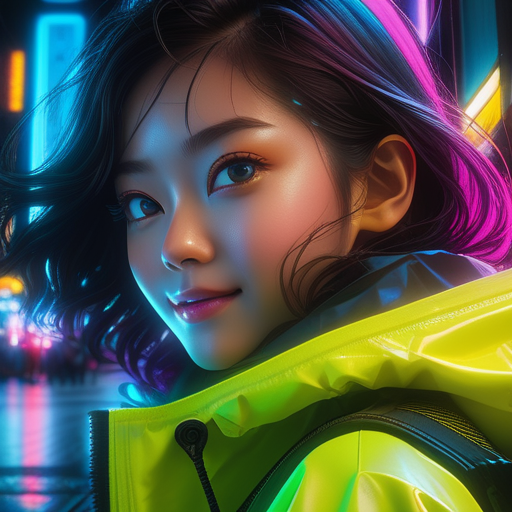

In [4]:
# txt2img

result1 = api.txt2img(prompt=" masterpiece, best quality, half body, portrait, night city, 1girl, anime, 3D, Japan, pixar, realistic, teen girl, smiling, cute face, harajuku fashion style, rain coat, beautiful, colourful, neon lights, cyberpunk, smooth skin, illustration, by stanley artgerm lau, sideways glance, foreshortening, extremely detailed 8K, smooth, high resolution, ultra quality, highly detail eyes, highly detail mouth, highly detailed face, perfect eyes, both eyes are the same, glare, Iridescent, Global illumination, hd, 8k realistic light and shadow, bright Eyes, fluorescent eyes",
                    negative_prompt=" (worst quality:1.5), (low quality:1.5), (normal quality:1.5), lowres, bad anatomy, bad hands, multiple eyebrow, (cropped), extra limb, missing limbs, deformed hands, long neck, long body, (bad hands), signature, username, artist name, conjoined fingers, deformed fingers, ugly eyes, imperfect eyes, skewed eyes, unnatural face, unnatural body, error, painting by bad-artist",
                    seed=1003,
                    styles=["anime"],
                    cfg_scale=7,
#                      sampler_index='DDIM',
                      steps=30,
                    )
result1.image

In [ ]:
# img2img

result2 = api.img2img(images=[result1.image], prompt=" masterpiece, best quality, half body, portrait, night city, 1girl, anime, 3D, Japan, pixar, realistic, teen girl, smiling, cute face, harajuku fashion style, rain coat, beautiful, colourful, neon lights, cyberpunk, smooth skin, illustration, by stanley artgerm lau, sideways glance, foreshortening, extremely detailed 8K, smooth, high resolution, ultra quality, highly detail eyes, highly detail mouth, highly detailed face, perfect eyes, both eyes are the same, glare, Iridescent, Global illumination, hd, 8k realistic light and shadow, bright Eyes, fluorescent eye", seed=5555, cfg_scale=6.5, denoising_strength=0.6)
result2.image

In [ ]:
# inpainting with img2img

from PIL import Image, ImageDraw

mask = Image.new('RGB', result2.image.size, color = 'black')
# mask = result2.image.copy()
draw = ImageDraw.Draw(mask)
draw.ellipse((210,150,310,250), fill='white')
draw.ellipse((80,120,160,120+80), fill='white')

# mask

inpainting_result = api.img2img(images=[result2.image],
                                mask_image=mask,
                                inpainting_fill=1,
                                prompt="cute cat",
                                seed=104,
                                cfg_scale=5.0,
                                denoising_strength=0.7)
inpainting_result.image

In [ ]:
result3 = api.extra_single_image(image=result2.image,
                                 upscaler_1="ESRGAN_4x",
                                 upscaling_resize=1.5)
print(result3.image.size)
result3.image

In [ ]:
result4 = api.extra_batch_images(images=[result1.image, result2.image],
                                 upscaler_1="ESRGAN_4x",
                                 upscaling_resize=1.5)
len(result4.images)

In [ ]:
result4.images[0]

In [ ]:
result4.images[1]

In [ ]:
# txt2img with scripts
XYPlotAvailableScripts = [
    "Nothing",
    "Seed",
    "Var. seed",
    "Var. strength",
    "Steps",
    "CFG Scale",
    "Prompt S/R",
    "Prompt order",
    "Sampler",
    "Checkpoint Name",
    "Hypernetwork",
    "Hypernet str.",
    "Sigma Churn",
    "Sigma min",
    "Sigma max",
    "Sigma noise",
    "Eta",
    "Clip skip",
    "Denoising",
    "Hires upscaler",
    "Cond. Image Mask Weight",
    "VAE",
    "Styles"
]

# Example call
XAxisType = "Steps"
XAxisValues = "32,64"
YAxisType = "Sampler"
YAxisValues = "k_euler_a, ddim, k_dpm_2_a"
drawLegend = "True"
includeSeparateImages = "False"
keepRandomSeed = "False"

result5 = api.txt2img(
    prompt="cute squirrel",
    negative_prompt="ugly, out of frame",
    seed=1003,
    cfg_scale=7,
    script_name="X/Y Plot",
    script_args=[
        XYPlotAvailableScripts.index(XAxisType),
        XAxisValues,
        XYPlotAvailableScripts.index(YAxisType),
        YAxisValues,
        drawLegend,
        includeSeparateImages,
        keepRandomSeed
    ]
)

result5.image